In [2]:
import pandas as pd
import math
import statistics
import numpy as np
pd.options.display.float_format = '{:20,.9f}'.format
df=pd.read_excel(r'C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Lorentz_LLE\Noise_added_u0_Datasets_Lorentz\lorentz_noise_data_1.xlsx')

# Modified MultiScale Entropy(MMSE) (Lorentz Data)

In [3]:
def mmse(data,scale):
    r=0.15*np.std(data)
    E=[]
    for i in range (len(scale)):
        buf=movingaverage(data,scale[i])
        E.append(SampEn(buf,r,scale[i]))
    return E

In [4]:
import numpy as np 
import statistics
def movingaverage(data,s):
    N=len(data)
    data1=[]
    for i in range(1,N-s+1):
        data1.append(statistics.mean(data[i-1:i-1+s]))
    #data=data1
    
    return data1
        

In [5]:
def SampEn(data,r,delay):
    N=len(data)
    Nn=0
    Nd=0
    for i in range(1,N-3*delay+1):
        for j in range(i+delay,N-2*delay+1):
            if abs(data[i-1]-data[j-1])<r and abs(data[i-1+delay]-data[j-1+delay])<r:
                Nn=Nn+1
                if abs(data[i-1+2*delay]-data[j-1+2*delay])<r:
                    Nd=Nd+1
    Entropy=-math.log(Nd/Nn)
    return Entropy

In [6]:
s=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


In [7]:
l=mmse(list(df['x'][:200]),s)
m=mmse(list(df['x'][:500]),s)
n=mmse(list(df['x'][:1000]),s)
o=mmse(list(df['x'][:2000]),s)

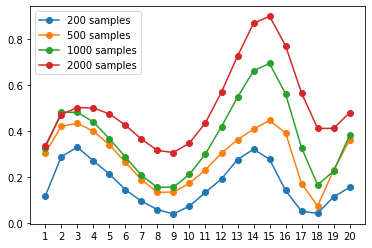

In [8]:
import matplotlib.pyplot as plt
plt.plot(s,l, marker='o')

plt.plot(s,m, marker='o')

plt.plot(s,n, marker='o')

plt.plot(s,o, marker='o')
plt.xticks(s) 
plt.legend(['200 samples','500 samples','1000 samples','2000 samples'])

# MMSE Random Data

In [9]:
import random
li_5000=[]
for i in range(5000):
    li_5000.append(round(random.random(),9))
df2=pd.DataFrame()
df2['x']=li_5000

In [10]:
pd.options.display.float_format = '{:20,.9f}'.format
df_5000 = df2['x']
df_200 = df_5000.sample(n=200)
df_500 = df_5000.sample(n=500)
df_1000 = df_5000.sample(n=1000)
df_1500 = df_5000.sample(n=1500)

In [13]:
s_200=mmse(df_200,s)
s_500=mmse(df_500,s)
s_1000=mmse(df_1000,s)
s_1500=mmse(df_1500,s)
s_5000 = mmse(df_5000,s)

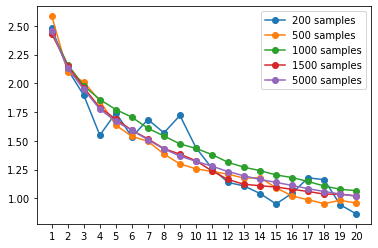

In [14]:
plt.plot(s,s_200, marker='o')

plt.plot(s,s_500, marker='o')

plt.plot(s,s_1000, marker='o')

plt.plot(s,s_1500, marker='o')

plt.plot(s,s_5000, marker='o')

plt.xticks(s) 
plt.legend(['200 samples','500 samples','1000 samples','1500 samples', '5000 samples'])